<a href="https://colab.research.google.com/github/Tavo22s/Sistema-difuso/blob/main/sistema_difuso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import skfuzzy.control as ctrl

In [9]:
universeA = np.linspace(0, 1, 51)
universeR = np.linspace(0, 1, 51)
universeM = np.linspace(0, 1, 201)

In [10]:
estado = ctrl.Antecedent(universeA, 'Estado del Libro')
puntualidad = ctrl.Antecedent(universeR, 'Puntualidad de entrega')
confianza = ctrl.Consequent(universeM, 'Confianza de prestamo')

In [22]:
namesE = ['Igual', 'Peor', 'Mucho peor']
namesP = ['Puntual', 'Tarde', 'Muy tarde']
namesC = ['Muy poca', 'Poca', 'Normal', 'Gran', 'Muy grande']

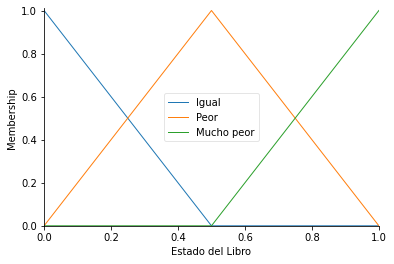

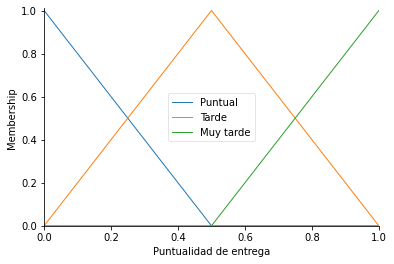

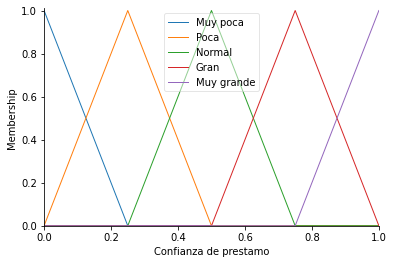

In [23]:
estado.automf(names = namesE)
puntualidad.automf(names = namesP)
confianza.automf(names = namesC)

estado.view()
puntualidad.view()
confianza.view()

In [25]:
rule1 = ctrl.Rule(antecedent=(estado['Igual'] & puntualidad['Puntual']),
consequent=confianza['Muy grande'], label="rule 1")
rule2 = ctrl.Rule(antecedent=(estado['Igual'] & puntualidad['Tarde']),
 consequent=confianza['Gran'],
label="rule 2")
rule3 = ctrl.Rule(antecedent=(estado['Igual'] & puntualidad['Muy tarde']),
 consequent=confianza['Normal'],
label="rule 3")
rule4 = ctrl.Rule(antecedent=(estado['Peor'] & puntualidad['Puntual']),
 consequent=confianza['Normal'],
label="rule 4")
rule5 = ctrl.Rule(antecedent=(estado['Peor'] & puntualidad['Tarde']),
 consequent=confianza['Poca'],
label="rule 5")
rule6 = ctrl.Rule(antecedent=(estado['Peor'] & puntualidad['Muy tarde']),
 consequent=confianza['Muy poca'],
label="rule 6")
rule7 = ctrl.Rule(antecedent=(estado['Mucho peor'] & puntualidad['Puntual']),
 consequent=confianza['Poca'],
label="rule 7")
rule8 = ctrl.Rule(antecedent=(estado['Mucho peor'] & puntualidad['Tarde']),
 consequent=confianza['Muy poca'],
label="rule 8")
rule9 = ctrl.Rule(antecedent=(estado['Mucho peor'] & puntualidad['Muy tarde']),
 consequent=confianza['Muy poca'],
label="rule 9")

In [26]:
system = ctrl.ControlSystem(rules=[rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
sim = ctrl.ControlSystemSimulation(system)

In [27]:
upsampled = np.linspace(0, 1, 21)
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)

for i in range(21):
  for j in range(21):
    sim.input['Estado del Libro'] = x[i, j]
    sim.input['Puntualidad de entrega'] = y[i, j]
    sim.compute()
    z[i, j] = sim.output['Confianza de prestamo']

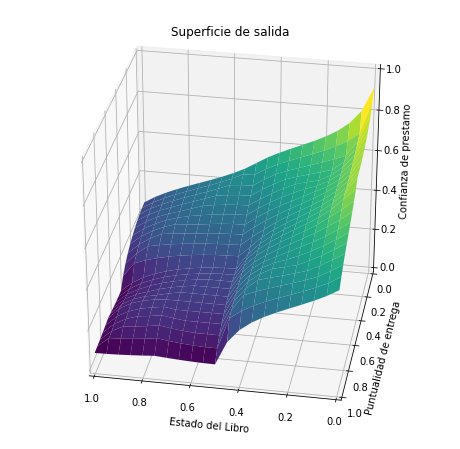

In [34]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0.4, antialiased=True)
plt.title('Superficie de salida')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('Estado del Libro')
ax.set_ylabel('Puntualidad de entrega')
ax.set_zlabel('Confianza de prestamo')
ax.view_init(30, 100)